In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.DataFrame({'Age':[19,20,22,25,30,35,40],'Salary':[5,7,8,25,32,50,70]})
df

,Age,Salary
0,19,5
1,20,7
2,22,8
3,25,25
4,30,32
5,35,50
6,40,70


In [ ]:
model=KMeans(n_clusters=2,random_state=42)
res=model.fit_predict(df)
res

array([0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
model.cluster_centers_

array([[23.2, 15.4],
       [37.5, 60. ]])

#CUSTOMER SEGMENTATION

In [ ]:
df=pd.read_csv("/content/customer_segmentation.csv")
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<Axes: >

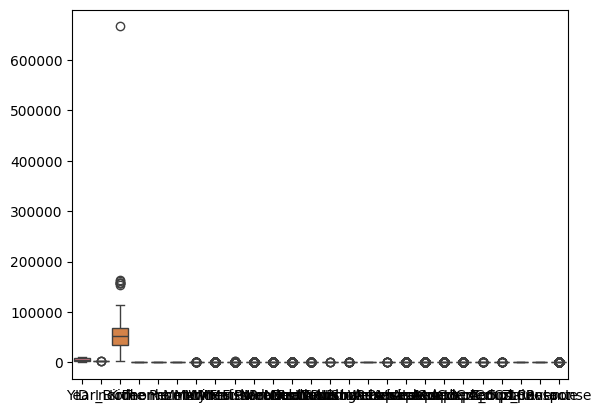

In [ ]:
sns.boxplot(df)

In [ ]:
df=df.drop(columns=['Z_CostContact','Z_Revenue'])

In [ ]:
col=df.columns

In [ ]:
for i in col:
  print(i,":",df[i].nunique())

ID : 2240
Year_Birth : 59
Education : 5
Marital_Status : 8
Income : 1974
Kidhome : 3
Teenhome : 3
Dt_Customer : 663
Recency : 100
MntWines : 776
MntFruits : 158
MntMeatProducts : 558
MntFishProducts : 182
MntSweetProducts : 177
MntGoldProds : 213
NumDealsPurchases : 15
NumWebPurchases : 15
NumCatalogPurchases : 14
NumStorePurchases : 14
NumWebVisitsMonth : 16
AcceptedCmp3 : 2
AcceptedCmp4 : 2
AcceptedCmp5 : 2
AcceptedCmp1 : 2
AcceptedCmp2 : 2
Complain : 2
Response : 2


In [ ]:
df=df.dropna( )

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df["Customer_Day"] = df["Dt_Customer"].dt.day
df["Customer_Month"] = df["Dt_Customer"].dt.month
df.drop("Dt_Customer", axis=1, inplace=True)

In [ ]:
num_col=df.select_dtypes(include='number').columns
cat_col=df.select_dtypes(exclude='number').columns

In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),num_col),
        ('ordinalencoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),cat_col),
    ]
)

In [ ]:
pipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',KMeans(n_clusters=2,random_state=42))
    ]
)
res=pipeline.fit_predict(df)

In [ ]:
df['res']=res

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Day,Customer_Month,res
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,4,9,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,8,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,21,8,1
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,10,2,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,0,0,0,0,0,0,0,13,6,1
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,0,0,1,0,0,0,10,6,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,0,1,0,0,0,0,0,25,1,1
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,0,0,0,0,0,0,0,24,1,1


In [ ]:
group=df.groupby('res')

In [ ]:
group.get_group(0)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Day,Customer_Month,res
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,8,3,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,10,2,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,19,1,0
7,6177,1985,PhD,Married,33454.0,1,0,32,76,10,...,0,0,0,0,0,0,0,8,5,0
8,4855,1974,PhD,Together,30351.0,1,0,19,14,0,...,0,0,0,0,0,0,1,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,7004,1984,Graduation,Single,11012.0,1,0,82,24,3,...,1,0,0,0,0,0,0,16,3,0
2232,8080,1986,Graduation,Single,26816.0,0,0,50,5,1,...,0,0,0,0,0,0,0,17,8,0
2234,8372,1974,Graduation,Married,34421.0,1,0,81,3,3,...,0,0,0,0,0,0,0,1,7,0
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,0,0,1,0,0,0,10,6,0


In [ ]:
group.get_group(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Day,Customer_Month,res
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,4,9,1
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,21,8,1
5,7446,1967,Master,Together,62513.0,0,1,16,520,42,...,0,0,0,0,0,0,0,9,9,1
6,965,1971,Graduation,Divorced,55635.0,0,1,34,235,65,...,0,0,0,0,0,0,0,13,11,1
12,2125,1959,Graduation,Divorced,63033.0,0,0,82,194,61,...,0,0,0,0,0,0,0,15,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,9817,1970,Master,Single,44802.0,0,0,71,853,10,...,0,0,0,0,0,0,0,21,8,1
2233,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,0,0,0,0,0,0,0,2,6,1
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,0,0,0,0,0,0,0,13,6,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,0,1,0,0,0,0,0,25,1,1


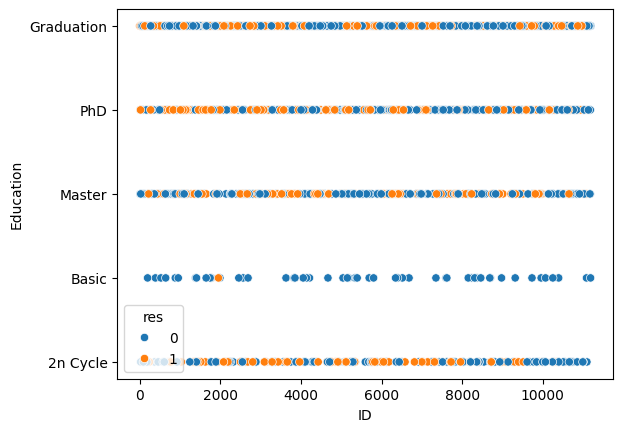

In [ ]:
sns.scatterplot(x=df['ID'],y=df['Education'],hue=df['res'])
plt.show()

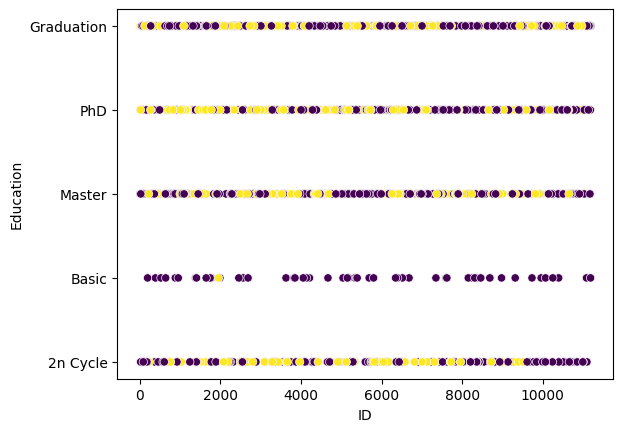

In [ ]:
sns.scatterplot(x=df['ID'],y=df['Education'],c=df['res'])
plt.show()

In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        # ('imputer_for_numcols',SimpleImputer(strategy='mean'),num_col)
        ('scaler',StandardScaler(),num_col),
        ('ordinalencoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),cat_col),
    ]
)

In [ ]:
pipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',PCA(n_components=2))
    ]
)
res1=pipeline.fit_transform(df)

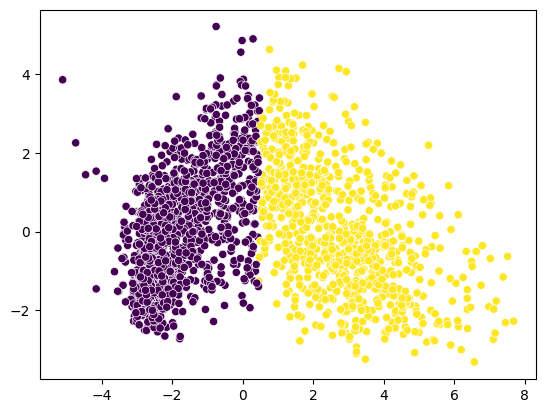

In [ ]:
sns.scatterplot(x=res1[:, 0],y=res1[:, 1],c=df['res'])
plt.show()